# Group Project: Recursive Animations and The Towers of Hanoi
###
By Bibi Lucas, Daniel Hogg, Dyland Davis, Desha Wallace and James Lin

In [1]:
# Imports... 
import random, pygame, os

pygame 2.2.0 (SDL 2.0.22, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 1. (core)
Task: Animating fractal constructions gives us direct insight into how the function generating the fractal operates. You are given a pygame animation function draw_sierpinski
(in the animation_examples.ipynb file) that draws the Sierpinski triangle. Using this
function the user is able to choose the depth of the triangle and to stop and start the
animation. You should develop this function so that the user is also able to change the
speed of the animation. You should also add colours to the triangle drawing.

In [2]:
def make_sierpinski(depth, triangle, triangle_list):
    '''
    Function inputs: depth (of recursion), triangle (vertex coordinates)
    triangle_list (list of triange coordinates)
    Modifies triangle_list: all the depth 1 (bottom) triangles are added 
    to this list (using recursion relative to the input triangle)
    '''
    (x0,y0) = triangle[0]
    (x1,y1) = triangle[1]
    (x2,y2) = triangle[2]
    # Maximum depth reached (going down) so add this triangle to the list
    if depth == 1:
        triangle_list.append(triangle)
        return None 
    # Otherwise split triangle into three sub triangles
    midpoint_A = (x0 + (x1-x0)/2.0, y0)
    midpoint_B = (x0 + (x2-x0)/2.0, y2 + (y0-y2)/2.0)
    midpoint_C = (x2 + (x1-x2)/2.0, y2 + (y1-y2)/2.0)
    # First triangle, recursive call on it
    new_triangle = ((x0,y0), midpoint_A, midpoint_B)
    make_sierpinski(depth-1, new_triangle, triangle_list)
    # Second triangle, recursive call on it
    new_triangle = (midpoint_A, (x1,y1), midpoint_C)
    make_sierpinski(depth-1,new_triangle,triangle_list)
    # Third triangle, recursive call on it
    new_triangle = (midpoint_B, midpoint_C, (x2,y2))
    make_sierpinski(depth-1, new_triangle, triangle_list)    
    # No need for a return statement (personal preference) 
    return None

In [14]:
def draw_sierpinski(depth=6):
    '''
    Function that draws the Sierpinski triangle as an animation. 
    The depth of the triangle (recursion) can be adjusted by entering 
    a depth integer value (in [1,10]) as a parameter. 
    For example: python sierpinski.py 8 
    '''
    
    dimensions = (900, 862)
    backgroundColour = (255,255,255)
    blue, black = (0,0,255), (0,0,0)
    # This is the overall outline triangle
    master_triangle = ((50,800),(850,800),(450,62))
    min_depth, max_depth = 1, 10
    speed_factor = 4
    depth = 6
    clock = pygame.time.Clock()
    warning = "Depth must be an integer in the interval [1,10]"

    if depth < min_depth: 
        depth = min_depth
        print(warning)
        print("Using depth {}".format(min_depth))
    if depth > max_depth: 
        depth = max_depth
        print(warning)
        print("Using depth {}".format(max_depth))

    # Defines the speed of the animation (see the animation loop) 
    frames_per_second = 20  + 10 * speed_factor
    # Make a list of all the triangle vertex coordinates of the given 
    # depth (in make_sierpinski we process  depth to work down to 1)
    triangle_list = []
    make_sierpinski(depth,master_triangle,triangle_list)

    # Initialise pygame and the screen display object and title
    pygame.init()
    screen = pygame.display.set_mode(dimensions)
    # Put the title and instructions for the animation in the title bar of the animation.
    caption = 'Sierpinski Triangle            '
    caption += '(1)  \'Space\' to start or pause    '
    caption += '(2)  Further keystroke instruction here?'
    pygame.display.set_caption(caption)

    # Initialise the display 
    screen.fill(backgroundColour)
    pygame.display.flip()

    # Total number of triangles to be drawn 
    number_of_triangles = len(triangle_list)
    index = 0
    draw_triangle = False
    keep_running = True

    # Animation loop 
    while keep_running:
        for event in pygame.event.get():
            # Exit (at end of this iteration) using quit (e.g Ctrl-q or red button)
            if event.type == pygame.QUIT:
                keep_running = False
            # Start and pause the animation with the space key 
            elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
                draw_triangle  = not draw_triangle 

        # Keep draw next triangle with index 'index' if not told to pause and not complete
        if draw_triangle and index  < number_of_triangles:
            pygame.draw.polygon(screen, black, triangle_list[index], 1)
            # Now update so that latest triangle is added 
            pygame.display.update()
            # Pause time before next iteration starts: one clock tick  
            clock.tick(frames_per_second)
            # Index uptate: index walks through triangle_list indices
            index += 1
            
    pygame.quit()
    return None

In [15]:
def run_sierpinski(): 
    min_depth, max_depth = 1, 10
    default_depth = 6
    # Get the depth from the user 
    try:
        # If either of the following lines failsthen the body of the except statement is run
        depth = int(input("Enter a depth (from {} to {}): ".format(min_depth,max_depth)))
        assert min_depth <= depth <= max_depth
    except:
        print("There was a problem with your input.", end = " ") 
        print("Using default depth:{}".format(default_depth))
        depth = default_depth
    # Now run the animation with the depth input by the user
    draw_sierpinski(depth) 
    return None

In [16]:
run_sierpinski()

: 

# 2. (Core)
Task: Fractals can simulate shapes found in the natural word. One simple example of
this is the construction of a recursively defined tree. The tree of depth 1 is just a trunk
with three straight branches. Then given the tree T of depth n the tree of depth n + 1 is
the tree T where every branch has been replaced by a tree of depth 1. In Figure 1 (from
the left) is such a tree of depth 1, 2, 3 and 4 and then a tree of depth 9 partially and
completely drawn.


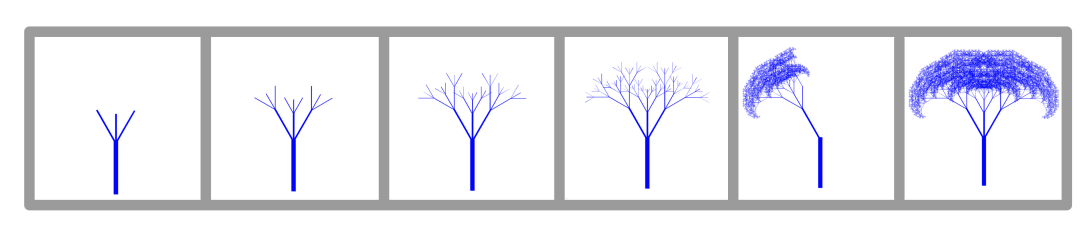



You should develop a pygame animation function that constructs a similar recursive tree.
The user should be able to choose the depth of the tree and should be able to start and
stop the animation and control its speed. The tree should be coloured with the trunk and
branches being brown and the leaves (i.e. the last level of branches) being green